<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/6%3A%20Ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Boosting

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


I will here look at some ensemble methods, beginning with **XGBoost**.

In [8]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)
features.describe()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4300.157125,4009.273150,4263.860860,4122.616195,4341.606870,4620.061720,4072.151250,4615.229300,4200.893915,4230.573235,4201.583060,4278.445325,4605.169335,4359.852780
std,36.361719,29.853264,20.788323,20.565528,16.691038,18.034865,20.933632,18.391027,17.810272,19.661149,24.397269,19.645651,33.067591,37.074555
min,4197.950000,3905.640000,4202.560000,4058.460000,4310.260000,4569.740000,4032.820000,4571.280000,4147.690000,4158.970000,4107.180000,4216.410000,4454.360000,4225.640000
25%,4280.510000,3990.770000,4250.260000,4108.720000,4331.790000,4611.790000,4057.440000,4604.100000,4190.260000,4219.490000,4189.740000,4267.180000,4590.642500,4342.050000
50%,4293.330000,4006.150000,4262.560000,4121.030000,4338.460000,4617.950000,4069.740000,4612.820000,4199.490000,4228.720000,4200.000000,4276.410000,4603.080000,4354.360000
75%,4309.740000,4023.590000,4270.260000,4133.460000,4347.180000,4626.150000,4083.590000,4623.080000,4209.230000,4238.970000,4211.280000,4286.150000,4617.950000,4371.790000
max,4497.440000,4152.820000,4385.640000,4234.360000,4452.820000,4754.870000,4174.870000,4731.280000,4315.380000,4352.310000,4325.640000,4397.950000,4796.920000,4538.970000


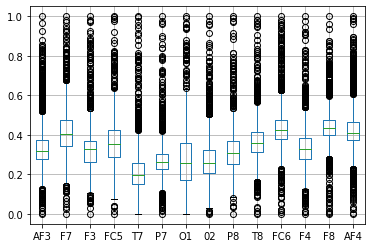

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)
features.boxplot()

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(features,trainset.label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [11]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.8778282619521152


On the Kaggle website they say that this should be a very promising model, so I'm going to explore this one for today.